In [1]:
import numpy as np

print(np.__version__)

1.20.1


# NumPy 개요

- URL : https://numpy.org

![대체 텍스트](https://numpy.org/doc/stable/_static/numpylogo.svg)



# Python 다차원 배열의 이해

## 숫자 자료형

* Python에서는 숫자형 변수로 데이터를 표현할 수 있다.
* 예를 들어, 세 명의 학생들로 이루어진 반이 있고 이 학생들의 수학 점수를 각각의 **숫자형 변수**에 저장하는 경우 아래처럼 처리할 수 있다.

In [3]:
# 세 명의 학생의 수학과목 점수 설정
math1 = 11
math2 = 12
math3 = 13

In [4]:
# 합과 평균구하기

total = math1 + math2  + math3
average = total / 3

print("수학점수 합: {}".format(total))
print("수학점수 평균: {}".format(average))

수학점수 합: 36
수학점수 평균: 12.0


- 그런데 만약 새로운 학생이 전학을 와서 시험을 치렀고, 이 학생의 성적을 추가한 점수들의 합과 평균을 구하려면 어떻게 해야 할까?

- 새로운 변수를 추가해야 한다.

In [ ]:
# 새로 전학온 학생의 점수를 위한 변수

math4 = 14

- 그리고 합과 평균을 구하는 코드 역시 수정해야 한다.

In [ ]:
total = math1 + math2 + math3 + math4 # 항목 추가
average = total / 4 # 분모 변경

print("수학점수 합: {}".format(total))
print("수학점수 평균: {}".format(average))

- 추가된 데이터를 새로 선언해 주는 것은 어쩔 수 없다 하더라도 합과 평균을 구하는 <font color="red">**코드를 매번 변경하는 것은 비효율적**</font>이다.

## 리스트 자료형

- 리스트 자료형에 데이터를 저장하여 이 문제를 해결할 수 있다.

- 세 명의 학생들로 이루어진 반이 있고 이 학생들의 수학 점수를 **리스트**에 저장하는 경우 아래와 같이 처리할 수 있다.

In [11]:
math_list = [11, 12, 13]

- 점수들의 합과, 평균은 다음과 같이 구할 수 있다.

In [4]:
total = 0
average = 0

for math in math_list:
    total += math
average = total / len(math_list)

print("수학점수 합: {}".format(sum))
print("수학점수 평균: {}".format(average))

수학점수 합: <built-in function sum>
수학점수 평균: 12.0


- 그런데 만약 새로운 학생이 전학을 와서 시험을 치렀고, 이 학생의 성적을 추가한 점수들의 합과 평균을 구하려면 어떻게 해야 할까?

- ~~새로운 변수를 추가해야 한다.~~

- **기존의 리스트에 새로운 데이터를 추가한다.**

In [14]:
math_list.append(14)

- ~~그리고 합과 평균을 구하는 코드 역시 수정해야 한다.~~

- 새로운 데이터가 추가되더라도 합과 평균을 구하는 **코드는 수정 없이 그대로 사용할 수 있다**.

In [6]:
total = 0
average = 0

for math in math_list:
    total += math
average = total / len(math_list)

print("수학점수 합: {}".format(total))
print("수학점수 평균: {}".format(average))

수학점수 합: 50
수학점수 평균: 12.5


- 그런데 만약 시험 문제에서 오류가 발견되어 모든 학생의 점수를 1점씩 올려줘야 하는 상황이 발생한다면 어떻게 처리해야 할까?

- 반복문이나 List comprehension같은 방법이 있다.

In [8]:
# 방법 1 (For loop 사용)

math_list2 = []
for math in math_list:
    math_list2.append(math+1)
    
math_list2




[12, 13, 14, 15]

In [15]:
# 방법 2 (List Comprehension 사용)

math_list3 = [math+1 for math in math_list]

math_list3

[12, 13, 14, 15]

- 여기서 구조를 확장해서,

- 1반의 점수가 11, 12, 13

- 2반의 점수가 21, 22, 23

- 3반의 점수가 31, 32, 33점이라고 한다면 중첩 리스트를 통해 아래처럼 나타낼 수 있다.

In [16]:
nested_math_list = [[11, 12, 13], [21, 22, 23], [31, 32, 33]]
print(nested_math_list)

[[11, 12, 13], [21, 22, 23], [31, 32, 33]]


- 중첩 리스트에서 각 원소에 1을 더하는 코드는 다음과 같다.

In [17]:
nested_math_list2 = []

for inner_list in nested_math_list:
    temp_list = []

    for math in inner_list:
        temp_list.append(math + 1)

    nested_math_list2.append(temp_list)

print(nested_math_list2)

[[12, 13, 14], [22, 23, 24], [32, 33, 34]]


- <font color="red">**문제점**</font>

    - 자료구조의 중첩이 증가하면 반복문도 하나 더 사용해야 한다.
    - 구조의 중첩이 증가할수록 코드는 복잡해질 수밖에 없다.

## NumPy로 구현한 다차원 배열

- **NumPy**를 사용하면 중첩된 자료구조를 효율적으로 다룰 수 있다.
 
- `import numpy as np` 형태로 사용하는게 일반적이다.

In [18]:
# Package import
import numpy as np


In [24]:
# ndarray의 생성
nested_math_list = [[11, 12, 13], [21, 22, 23], [31, 32, 33]]

math_ndarray = np.array(nested_math_list)

print(math_ndarray)
print(type(math_ndarray))

print(nested_math_list)
print(type(nested_math_list))


[[11 12 13]
 [21 22 23]
 [31 32 33]]
<class 'numpy.ndarray'>
[[11, 12, 13], [21, 22, 23], [31, 32, 33]]
<class 'list'>


- 각 원소에 1을 더하려면,

In [25]:
new_ndarray = math_ndarray + 1

new_ndarray


array([[12, 13, 14],
       [22, 23, 24],
       [32, 33, 34]])

* NumPy에 구현된 함수를 이용해서 합이나 평균도 쉽게 구할 수 있다.

In [26]:
np.sum(new_ndarray)

207

In [31]:
np.mean(new_ndarray)

23.0

In [32]:
# 각 반의 수학 합계와 평균
np.sum(new_ndarray, axis = 1)

array([39, 69, 99])

In [34]:
np.mean(new_ndarray, axis = 1)

array([13., 23., 33.])

# Numpy 특징

## NumPy의 장점

- 코어 부분이 C로 구현되어 동일한 연산을 하더라도 Python에 비해 속도가 빠름
- 라이브러리에 구현되어있는 함수들을 활용해 짧고 간결한 코드 작성 가능
- 효율적인 메모리 사용이 가능하도록 구현됨

## Python의 list가 느린 이유

- 파이썬 리스트는 결국 포인터의 배열
- 경우에 따라서 각각 객체가 메모리 여기저기 흩어져 있음
- 그러므로 캐시 활용이 어려움

## NumPy의 ndarray가 빠른 이유
- ndarray는 타입을 명시하여 원소의 배열로 데이터를 유지
- 다차원 데이터도 연속된 메모리 공간이 할당됨
- 많은 연산이 dimensions과 strides를 잘 활용하면 효율적으로 가능

![title](https://www.mybluelinux.com/img/post/posts/0123/NumPy-Illustrated-02.webp)

# 기초

## 배열 생성-1

### array()를 이용한 생성
* 가장 기본적인 방법은, `array` 함수를 사용하여 일반적인 Python list 또는 tuple에서 배열을 만드는 것이다.

### arrange()를 이용한 생성

* 일련의 숫자를 만들기 위해, NumPy는 Python의 `range` 내장 함수와 유사한 함수인 `arange` 함수를 제공한다.
* default value : start = 0, step = 1

In [4]:
# 3) 2차원 배열 matrix (3X2)
a = np.array([[1,2], [3,4], [5,6]])

print(a)
print(a.dtype)
print(a.ndim)
print(a.shape)
print(a.size)
print(a.nbytes)

[[1 2]
 [3 4]
 [5 6]]
int32
2
(3, 2)
6
24


In [5]:
# 3) 3차원 배열 Tensor (2 X 2 X 3)
a = np.array([[[111,112,113], [121,122,123]], [[211,212,213], [221,222,223]]])

print(a)
print(a.dtype)
print(a.ndim)
print(a.shape)
print(a.size)
print(a.nbytes)

[[[111 112 113]
  [121 122 123]]

 [[211 212 213]
  [221 222 223]]]
int32
3
(2, 2, 3)
12
48


### 다차원 배열의 생성

- 다차원 배열의 원소는 위와 같은 데이터 타입을 가질 수 있다.
- 다차원 배열의 모든 원소는 동일한 데이터 타입을 가져야 한다.

**boolean**

**number**

- number 데이터를 입력해서 다차원 배열을 생성.
- 정수형, 부호없는 정수형, 실수형, 복소수형이 있다.
- 정수형 : <font color="red">(default data type은 운영체제에 따라 다르다.)</font>

- 부호없는 정수형의 default data type은 'uint32'다. <font color="red">(default data type은 운영체제에 따라 다르다.)</font>

**실수형**
- 실수형의 default data type은 'float64'

**형변환**
- 데이터가 정수로 입력되더라도 data type을 실수형으로 명시한다면 실수형으로 자동 형변환이 일어난다

- 실수 데이터로 입력한 뒤에 data type을 정수형으로 명시

## NumPy 배열의 주요 속성

NumPy의 배열 클래스를 `ndarray(N-Dimentional Array)`로 부른다.

`ndarray` 객체에서 중요한 속성은 다음과 같다.

1) **ndarray.ndim**

- 배열의 축(차원)의 개수


2) **ndarray.shape**

- 배열의 차원. 각 차원의 크기를 나타내는 정수 튜플을 반환한다. n개의 행과 m개의 열이 있는 행렬의 경우, `shape`는 `(n, m)`이다.


3) **ndarray.size**

- 배열의 요소의 총 개수.


4) **ndarray.dtype**

- 배열의 요소의 자료형. 표준 Python 자료형을 사용하여 만들거나 지정할 수도 있고,
- 추가적으로 NumPy가 제공하는 자체 자료형(numpy.int32, numpy.int16, numpy.float64 등)을 사용할 수도 있다.
    
5) **ndarray.nbytes**

- ndarray object의 메모리 크기 반환
   

[[1 2]
 [3 4]
 [5 6]]
int32
2
(3, 2)
6
24


[[[111 112 113]
  [121 122 123]]

 [[211 212 213]
  [221 222 223]]]
int32
3
(2, 2, 3)
12
48


- 생성 시 배열의 유형을 명시적으로 지정 (복소수 데이터타입의 생성

## 배열 생성-2

### 다차원 배열 생성-2

* 다양한 함수를 이용해서 배열을 만들 수도 있다.
* `zeros` 함수는 0으로 가득 찬 배열을 생성한다.
* `ones` 함수는 1로 가득 찬 배열을 생성한다.
* `empty` 함수는 메모리의 상태에 따라 초기 값이 임의로 설정되는 요소로 이루어진 배열을 생성한다.

### numpy.zeros
- 모든 요소가 0으로 이루어진, 지정한 크기의 새로운 배열을 생성


In [13]:
import numpy as np

# np.zeros?

a = np.zeros(4, dtype=int)
a
b = np.zeros((3,3))
b

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [14]:
c = np.zeros_like(b)
c

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### **numpy.empty**
- 엔트리를 초기화하지 않고, 지정한 크기의 새로운 배열을 생성

In [20]:
f = np.empty((5,5))
print(f)

[[7.55907938e-312 7.75683064e-322 0.00000000e+000 0.00000000e+000
  7.55430502e-312]
 [3.16251369e+180 8.42103019e-143 7.37108894e+228 1.78818445e-047
  1.67772392e+243]
 [1.16466606e-028 3.45365695e+175 1.89052177e+150 6.02183035e+151
  9.03292974e+271]
 [6.96411098e+252 4.03824032e+246 9.46966807e-096 1.04060029e-095
  8.37177924e-144]
 [6.32275946e+233 3.06836102e+257 4.56310099e-144 1.16442250e-028
  8.08765703e-312]]


In [23]:
g = np.empty_like(f, dtype=int)
print(g)

[[4128860 6029375 3801155 5570652 6619251]
 [7536754 5570652 6619251 6029426 6881326]
 [7929968 6815860 7209071 7536732 7536761]
 [7536685 7667828 7536738 6226012 6881375]
 [6881390 6226036 3014751 7929968     105]]


### numpy.ones
- 모든 요소가 1로 이루어진, 지정한 크기의 새로운 배열을 생성

In [15]:
d = np.ones(5)
print(d)

[1. 1. 1. 1. 1.]


In [18]:
e = np.ones_like(c, dtype=int)
print(e)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


## 배열 생성-3

### linspace 함수
- 특정 범위 안에서 등분하여 요소들을 설정
- 시작 값, 끝 값까지 nums 개수만큼 동일한 간격에 걸쳐 행렬을 만든다.

In [26]:
a = np.arange(1, 10, 0.5)
len(a)

18

In [29]:
b = np.linspace(0, 5, 9)
print(len(b))
b

9


array([0.   , 0.625, 1.25 , 1.875, 2.5  , 3.125, 3.75 , 4.375, 5.   ])

### numpy.identity, numpy.eye

* 지정한 크기의 정방 단위 행렬을 생성.
* 선형대수학에서, 단위 행렬은 주대각선의 원소가 모두 1이며 나머지 원소는 모두 0인 정사각 행렬이다.
* 대각선에 1을, 그 외에 0을 가지는 2차원 배열
* eye() 함수도 identity() 함수와 같은 기능을 한다.

In [3]:
np.identity(3, dtype=int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [6]:
np.eye(3,4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [7]:
np.eye(3,4, -1)

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

### numpy.full
- 지정한 크기에 입력한 원소를 전부 채운 행렬을 만든다.

In [8]:
np.full((3,4), 7)

array([[7, 7, 7, 7],
       [7, 7, 7, 7],
       [7, 7, 7, 7]])

In [10]:
7*np.ones((3,4), dtype=int)

array([[7, 7, 7, 7],
       [7, 7, 7, 7],
       [7, 7, 7, 7]])

### like 함수

## 기본 연산

- 배열에 대한 산술 연산자는 **요소별**로 적용된다. 새로운 배열이 생성되고 결과로 채워진다.

### 산술연산

- 배열의 모든 요소의 합을 구하기 등, 많은 단항 연산이 `ndarray` 클래스의 메서드로 구현되어 있다.

In [25]:
import numpy as np

# 1) 덛셈
x = np.add(1.0 , 4.0)
print(X)
x = np.arange(9.0).reshape(3, 3)
print(X)

y = np.arange(3.0)
print(y)

print(x + y)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[0. 1. 2.]
[[ 0.  2.  4.]
 [ 3.  5.  7.]
 [ 6.  8. 10.]]


In [33]:
print(x, y, sep="\n")
np.add(x, y)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[0. 1. 2.]


array([[ 0.,  2.,  4.],
       [ 3.,  5.,  7.],
       [ 6.,  8., 10.]])

In [26]:
print(x, y, sep="\n")
np.multiply(x, y)

array([[ 0.,  1.,  4.],
       [ 0.,  4., 10.],
       [ 0.,  7., 16.]])

In [27]:
print(x, y, sep="\n")
np.subtract(x, y)

array([[0., 0., 0.],
       [3., 3., 3.],
       [6., 6., 6.]])

In [35]:
np.true_divide(x, y)

<ipython-input-35-192e9df149d2>:1: RuntimeWarning: divide by zero encountered in true_divide
  np.true_divide(x, y)
<ipython-input-35-192e9df149d2>:1: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(x, y)


array([[nan, 1. , 1. ],
       [inf, 4. , 2.5],
       [inf, 7. , 4. ]])

In [38]:
x = np.arange(4)
x ** 2

array([0, 1, 4, 9], dtype=int32)

In [43]:
np.remainder([3, 5], [7, 11])

array([3, 5], dtype=int32)

- `+=` 및 `*=`과 같은 일부 연산자는 새 배열을 생성하지 않고 기존 배열을 수정한다.

In [47]:
a = np.zeros((2, 3), dtype=int)
a += 1
print(a)
a *= 3
print(a)

[[1 1 1]
 [1 1 1]]
[[3 3 3]
 [3 3 3]]


* 연산 시 자료형은 적절하게 형변환(Upcasting)된다.

### 통계연산

* 참고 : https://docs.scipy.org/doc/numpy/reference/routines.statistics.html
* 통계 연산은 axis와 밀접한 관계가 있다.

In [48]:
A = np.arange(1, 10).reshape(3,3)

print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [52]:
A.sum()

45

In [54]:
print(A.sum(axis = 0))
print(A.sum(axis = 1))


[12 15 18]
[ 6 15 24]


In [57]:
print(A.mean())
print(A.mean(axis = 0))
print(A.mean(axis = 1))

5.0
[4. 5. 6.]
[2. 5. 8.]


In [58]:
print(A.cumsum())
print(A.cumsum(axis = 0))
print(A.cumsum(axis = 1))

[ 1  3  6 10 15 21 28 36 45]
[[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]
[[ 1  3  6]
 [ 4  9 15]
 [ 7 15 24]]


**numpy.amin, numpy.amax**
- axis 을 따른 배열 또는 최소의 최소치

In [65]:
print(np.amin(A))
print(np.amin(A, axis = 0))
print(np.amin(A, axis = 1))

1
[1 2 3]
[1 4 7]


In [66]:
print(np.amax(A))
print(np.amax(A, axis = 0))
print(np.amax(A, axis = 1))

9
[7 8 9]
[3 6 9]


**numpy.median**
- axis 을 따른 배열 중앙값

In [67]:
print(np.median(A))
print(np.median(A, axis = 0))
print(np.median(A, axis = 1))

5.0
[4. 5. 6.]
[2. 5. 8.]


In [76]:
B = np.arange(1,17).reshape(4,4)

print(np.median(B))
print(np.median(B, axis = 0))
print(np.median(B, axis = 1))

8.5
[ 7.  8.  9. 10.]
[ 2.5  6.5 10.5 14.5]


**numpy.mean**
- 축을 따라 산술 평균을 계산
- 가중평균을 구하려면 numpy.average를 사용

**numpy.var, numpy.std**
- 지정된 축을 따라 분산, 표준편차를 계산

In [74]:
print(np.var(A))
print(np.std(A))

6.666666666666667
2.581988897471611


**np.max**
- np.amax의 별칭
- 하나의 배열에서만 동작 --> 스칼라 값 반환
- axis를 이용하면 배열의 축에 따라 최대값(최소값을 찾는다.)

**np.maximum**

- 두 개의 배열을 가져와 요소별 최대값 계산
- broadcast 될 수 없다.
- 참고 : https://newbedev.com/numpy-max-vs-amax-vs-maximum

In [82]:
a = np.array([3, 6, 1])
b = np.array([4, 2, 9])

np.maximum(a, b)

array([4, 6, 9])

In [ ]:
np.maximum?

In [ ]:
c = np.array([3, 6, 1])
d = np.array([4, 2, 9, 8])
# np.maximum?



np.maximum(c, d)

### 최소값, 최대값 아규먼트 위치
- argmax(), argmin()
    - 제일 큰 값 위치 정보
    - 제일 작은 값 위치 정보


- np.where(조건)
- np.where(조건, 조건에 맞을 때 값, 조건과 다를 때 값)

In [88]:
c = np.array([3, 6, 1])
d = np.array([4, 2, 9, 8])

# index 값을 return
np.argmax(d)

2

In [98]:
c = np.array([5, 7, 8, 1, 3, 9, 2])
np.where( c > 5)
print(np.where(c > 5, True, False))
print(np.where(c > 5, c, 0))

[False  True  True False False  True False]
[0 7 8 0 0 9 0]


### 비교연산

**단순비교**
* 연산자를 이용하여 element별 비교
* ==, !=, >, >=, <, <=


In [103]:
a = np.array([1,2,3])
b = np.array([1,2,3])
c = np.array([3,2,5])

print(a == b)
print(a == c)


[ True  True  True]
[False  True False]


In [106]:
d = np.arange(1, 10).reshape(3,3)
print(d)

d%2 == 0

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[False,  True, False],
       [ True, False,  True],
       [False,  True, False]])

**all(), any() 을 이용한 비교**
- all() : 요소 전체가 같아야 하나의 True
- any() : 요소 전체중 하나만 같아도 True

In [110]:
print(np.all(a==b))
print(np.all(a==c))

print(np.any(a==c))

True
False
True


### Boolean 연산

* logical_and, logical_or, logical_not, logical_xor
* 결과는 True/False로 리턴

In [124]:
d = np.arange(1, 11).reshape(2,5)

x = d % 2 == 0 
y = d > 4
print(x)
print()
print(y)
print()

print(np.logical_and(x, y))
print()
print(np.logical_or(x,y))
print()
print(np.logical_xor(x, y))

[[False  True False  True False]
 [ True False  True False  True]]

[[False False False False  True]
 [ True  True  True  True  True]]

[[False False False False False]
 [ True False  True False  True]]

[[False  True False  True  True]
 [ True  True  True  True  True]]

[[False  True False  True  True]
 [False  True False  True False]]


# 행렬연산

`*` 연산자 또한 요소별로 적용된다.

`@` 연산자 또는 `dot` 함수를 사용하여 행렬 곱을 수행할 수 있다.

In [19]:
import numpy as np


In [20]:
A = np.array([[1,2]
            ,[3,4]])
B = np.array([[0,1]
            ,[1,0]])

In [ ]:
print(A * B)
print(A @ B)
print(A.dot(B))

## 내적

### * 연산자
- 형태(shape)가 동일한 두 행렬을 원소끼리(element-wise) 곱하는 연산자
- shape이 다르면 오류발생
- 교환법칙 가능

In [ ]:
A = np.array([[1,2]
            ,[3,4]])
B = np.array([[0,1]
            ,[1,0]])

In [12]:
# 교환 법칙 확인
A * B == B * A

array([[ True,  True],
       [ True,  True]])

In [15]:
# shape 이 다르면?
C = np.array([1,2])
D = np.array([[3],[5]])

C * D

array([[ 3,  6],
       [ 5, 10]])

In [16]:
# ValueError
A = np.arange(6).reshape(2,3)       
B = np.arange(-5, 1).reshape(3,2)

A * B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

### @, dot() 연산자 / numpy.matmul()

- 두 벡터(vector)의 내적, 내적곱, 점곱 등을 계산하는 함수
- 행렬곱에서도 사용가능하지만, 그러한 경우 공식문서에서는 numpy.matmul 사용을 권장
- 두 행렬의 곱을 numpy.dot으로 계산하려면, 첫 번째 행렬의 열크기(column)와 두번째 행렬의 행크기(row)가 서로 같아야 함

**dot()과 matmul()의 차이**
- dot는 행렬과 상수(constant)의 곱셈을 가능, matmul은 Error 발생
- 3차원 이상의 행렬곱(Tensor multiplication)을 수행할 경우, 결과가 다르다

In [21]:
A = np.arange(6).reshape(2,3)
B = np.arange(-5, 1).reshape(3,2)

print(np.matmul(A, B))
print(np.matmul(B, A))

[[ -5  -2]
 [-32 -20]]
[[-12 -21 -30]
 [ -6 -11 -16]
 [  0  -1  -2]]


In [22]:
print(A.dot(B))
print(B.dot(A))

[[ -5  -2]
 [-32 -20]]
[[-12 -21 -30]
 [ -6 -11 -16]
 [  0  -1  -2]]


In [23]:
print(np.dot(A,B))
print(np.dot(B,A))

[[ -5  -2]
 [-32 -20]]
[[-12 -21 -30]
 [ -6 -11 -16]
 [  0  -1  -2]]


## 전치(transpose)

* 전치는 기존 행렬의 행과 열을 교환하는 것, 즉 주대각선을 기준으로 반사 대칭하는 것을 말한다.

* 배열 객체의 ‘T’ 속성을 사용한다.


In [26]:
A = np.arange(4).reshape(2,2)

B = A.T
print(A)
print(B)

[[0 1]
 [2 3]]
[[0 2]
 [1 3]]


- 차원이 1인 배열을 전치할 경우 결과 배열은 원본 배열과 동일하다.

In [31]:
A = np.arange(1,5).reshape(2,2)
B = A.flatten()
print(B, B.ndim)
print(B.T, B.T.ndim)

[1 2 3 4] 1
[1 2 3 4] 1


* 대부분의 이러한 연산들은 `axis` 매개 변수를 지정하면 배열의 지정된 축을 따라 작업을 적용 할 수 있다.

# axis의 개념

## axis 란

* NumPy 배열은 다차원 배열을 지원하며 배열의 구조는 "Shape"으로 표현된다.
* Shape은 배열의 구조를 파이썬 Tuple 자료형으로 정의
* 예를 들어 32x32 컬러 사진은 높이가 32, 폭이 32, 픽셀 당 3개 채널(RGB)로 구성된 데이터 구조를 갖게 되므로
컬러 사진 데이터는 (32, 32, 3)인 Shape을 갖는다.
* 다차원 배열의 데이터 방향을 axis로 표현한다.
* axis는 0부터 시작하며 집계(Aggregation) 함수는 배열 데이터의 집계 방향을 지정하는 axis 옵션을 제공

<img src="./files/images/numpy_axis.png" width="50%">


<img src="./files/images/numpy_axis2.png">

In [33]:
import numpy as np

In [37]:
A = np.arange(12).reshape(3, 4)
print(A)

print("전체합계 : ", A.sum())
print("axis = 0 합계 : ", A.sum(axis = 0)) # 열의 위치가 같다
print("axis = 1 합계 : ", A.sum(axis = 1)) # 행의 위치가 같다



[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
전체합계 :  66
axis = 0 합계 :  [12 15 18 21]
axis = 1 합계 :  [ 6 22 38]


In [50]:
B = np.arange(24).reshape(2,3,4)
print(B)
print("전체 합계 : ", B.sum())
print(B.shape,"\n" )

print("axis = 0 합계 : ", B.sum(axis = 0), sep="\n") # 면의 위치가 같은 값들의 합
print(B.sum(axis = 0 ).shape, "\n")
print("axis = 1 합계 : ", B.sum(axis = 1), sep="\n") # 열의 위치가 같은 값들의 합
print(B.sum(axis = 1).shape, "\n")
print("axis = 2 합계 : ", B.sum(axis = 2), sep="\n") 
print(B.sum(axis = 2).shape, "\n")

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
전체 합계 :  276
(2, 3, 4) 

axis = 0 합계 : 
[[12 14 16 18]
 [20 22 24 26]
 [28 30 32 34]]
(3, 4) 

axis = 1 합계 : 
[[12 15 18 21]
 [48 51 54 57]]
(2, 4) 

axis = 2 합계 : 
[[ 6 22 38]
 [54 70 86]]
(2, 3) 



# 배열의 형태(shape) 변경

## numpy.reshape() 혹은 numpy.ndarray.reshape()

* 데이터를 변경하지 않고 배열을 새로운 shape로 수정한다.

In [ ]:
# reshape



## numpy.ndarray.resize()

* 원본 배열을 새로운 shape로 수정한다.

## numpy.ndarray.flatten()

* 배열을 1차원으로 만든다.

## expand_dim

- numpy array의 차원을 늘려 줌

## numpy.concatenate()

* 두 개 이상의 배열을 연결한다.
* concatenate() 함수를 수행하려면 차원 수가 같아야 한다.

* 세 개 이상의 배열을 연결할 수도 있다.

* axis 인수를 설정하여 연결 방향을 정할 수 있다.

# 인덱싱, 슬라이싱, 반복

* **1차원** 배열은 Python list와 같이 인덱싱, 슬라이싱, 반복할 수 있다.

## 슬라이싱

* 파이썬 리스트와 유사하게, Numpy 배열도 슬라이싱이 가능
* Numpy 배열은 다차원인 경우가 많기에, 각 차원별로 어떻게 슬라이스할건지 명확히 해야 한다. 
* Numpy 배열을 슬라이싱하면, 연속된 값을 가져오기에 결과로 얻어지는 배열은 언제나 원본 배열의 부분 배열

**슬라이싱 방법** 
- `a[행 슬라이싱 시작:행 슬라이싱 끝, 열 슬라이싱 시작:열 슬라이싱 끝]`
- **시작값**부터 **끝값** <font color="red">전</font>까지 슬라이싱

In [62]:
import numpy as np

A = np.arange(1, 13).reshape(3,4)
print(A)
print(A[0:2, 0:4])
print(A[:2, :])
print(A[:2])
print(A[:,:2])



[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[1 2 3 4]
 [5 6 7 8]]
[[1 2 3 4]
 [5 6 7 8]]
[[1 2 3 4]
 [5 6 7 8]]
[[ 1  2]
 [ 5  6]
 [ 9 10]]


In [73]:
B = np.arange(1,25).reshape(4, 6)
print(B)

print(B[1:3, 1:4])
print(B[1:-1, 1:-1])

copied = B[1:-1, 1:-1]
print(copied)

copied[:,1:3] = 999

print(copied)
print(B)

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]]
[[ 8  9 10]
 [14 15 16]]
[[ 8  9 10 11]
 [14 15 16 17]]
[[ 8  9 10 11]
 [14 15 16 17]]
[[  8 999 999  11]
 [ 14 999 999  17]]
[[  1   2   3   4   5   6]
 [  7   8 999 999  11  12]
 [ 13  14 999 999  17  18]
 [ 19  20  21  22  23  24]]


## 인덱싱

In [78]:
C = np.arange(1, 25).reshape(4, 6)
row1 = C[0]
cols1 = C[:,0]

print(row1)
print(cols1)

cols1 = 44
print(C)

[1 2 3 4 5 6]
[ 1  7 13 19]
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]]


## 인덱싱 & 슬라이싱 그리고 차원

- 정수 인덱싱과 슬라이싱을 혼합해서 사용하면 낮은 차원의 배열이 생성되지만, 슬라이싱만 사용하면 원본 배열과 동일한 차원의 배열이 생성 

## 인덱싱&슬라이싱 - 값 복사&참조

- 슬라이싱된 배열은 원본 배열과 같은 데이터를 참조한다.
- <font color="red">즉 슬라이싱된 배열을 수정하면 원본 배열 역시 수정.</font>


- 인덱싱은 값을 복사하므로 복사된 값을 변경해도 원본의 값은 변하지 않는다.
- **특별히 인덱싱을 써야 하는 상황이 아니라면, 인덱싱보다 슬라이싱을 추천**


* **다차원** 배열은 축당 하나의 인덱스를 가질 수 있다. 각 축에 대해 인덱싱, 슬라이싱을 차례로 적용할 수 있다.

* 축 수보다 적은 수의 인덱스를 제공한 경우, 생략된 인덱스는  전 범위에 대한 슬라이스(`:`)로 간주된다.

* 다차원 배열에 대한 **반복**은 첫 번째 축과 관련하여 수행된다.

In [80]:
D = np.arange(16).reshape(4,4)

for row in D:
    print(row)
    
for i in D:
    for j in i:
        print(j, end="\t")
    print()

[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]
[12 13 14 15]
0	1	2	3	
4	5	6	7	
8	9	10	11	
12	13	14	15	


* `flat` 속성을 이용하면 모든 요소에 대해 반복을 수행할 수 있다.

In [81]:
for i in D.flat:
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


# Boolean Indexing

In [90]:
import numpy as np

A = np.arange(1, 25).reshape(4, 6)
print(A)

even_arr = A % 2 == 0
print(even_arr)

temp = A[even_arr]
print(A[A%2==0])

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]]
[[False  True False  True False  True]
 [False  True False  True False  True]
 [False  True False  True False  True]
 [False  True False  True False  True]]
[ 2  4  6  8 10 12 14 16 18 20 22 24]


In [98]:
ary = np.array([1, 4, 6, -1, 34, 7, 8, 37, 5], float)
ary[ary > 7]

temp = ary[ary>5]
print(temp)
temp[0] = 99

print(temp)
print(ary)

[ 6. 34.  7.  8. 37.]
[99. 34.  7.  8. 37.]
[ 1.  4.  6. -1. 34.  7.  8. 37.  5.]


# Fancy Indexing

In [108]:
arr = np.arange(15).reshape(5, 3)
print(arr)
t1 = arr[0:2, :]
print(t1)

t1[0,0] = 10
print(arr)

t2 = arr[[0, 2], :]
print(t2)

t2[0, 0] = 20
print(t2)
print(arr)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[[0 1 2]
 [3 4 5]]
[[10  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[[10  1  2]
 [ 6  7  8]]
[[20  1  2]
 [ 6  7  8]]
[[10  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


# [ 연습 문제 ] 성적 처리

## [ 문제 1 ] score.csv 파일을 읽어 data 변수에 저장

In [1]:
import numpy as np

data = np.loadtxt("./files/data/score.csv", delimiter=",", dtype = float)
print(data)

[[  1.  85.  96.  75.  77.  89.]
 [  2.  89.  85.  74.  76.  56.]
 [  3.  90.  63.  95.  75.  99.]
 [  4. 100.  45.  89.  78.  88.]
 [  5.  63.  56.  99.  90.  85.]
 [  6.  75.  65.  78.  89.  24.]
 [  7.  56.  78.  12.  36.  98.]
 [  8.  85.  77.  45.  63.  89.]
 [  9.  55.  74.  89.  54.  69.]
 [ 10.  98.  71.  75.  86.  77.]]


## [ 문제 2 ] data중에서 학생들의 번호 추출
- 추출한 변수를 std_id라는 변수에 대입하고 정수형 타입으로 변환

In [3]:
std_id = [int(i[0]) for i in data]
print(std_id)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [3]:
std_id = data[:, :1]
std_id = std_id.astype(int)
print(std_id)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

## [ 문제 3 ] 학생의 점수만 추출
- 학생의 점수만 추출하여 std_score 라는 변수에 대입

In [6]:
std_score = data[:,1:]
print(std_score)

[[ 85.  96.  75.  77.  89.]
 [ 89.  85.  74.  76.  56.]
 [ 90.  63.  95.  75.  99.]
 [100.  45.  89.  78.  88.]
 [ 63.  56.  99.  90.  85.]
 [ 75.  65.  78.  89.  24.]
 [ 56.  78.  12.  36.  98.]
 [ 85.  77.  45.  63.  89.]
 [ 55.  74.  89.  54.  69.]
 [ 98.  71.  75.  86.  77.]]


In [4]:
std_score = data[:, 1:]
print(std_score)

[[ 85.  96.  75.  77.  89.]
 [ 89.  85.  74.  76.  56.]
 [ 90.  63.  95.  75.  99.]
 [100.  45.  89.  78.  88.]
 [ 63.  56.  99.  90.  85.]
 [ 75.  65.  78.  89.  24.]
 [ 56.  78.  12.  36.  98.]
 [ 85.  77.  45.  63.  89.]
 [ 55.  74.  89.  54.  69.]
 [ 98.  71.  75.  86.  77.]]


## [ 문제 4 ] 각 과목별 최고, 최저, 평균 점수 구하기
- Dictionary으로 출력
- 예 ) 과목별 최고 점수 : {"1과목": 100.0 , ...} 이런식

In [11]:
sub_max = dict()
sub_min = dict()
sub_avg = dict()

for i in range(1,6):
    sub_max["%d과목"%(i)] = std_score.max(axis = 0)[i-1]
    sub_min["%d과목"%(i)] = std_score.min(axis = 0)[i-1]
    sub_avg["%d과목"%(i)] = std_score.mean(axis = 0)[i-1]

print("과목별 최대 점수", sub_max, sep="\n")
print("과목별 최소 점수", sub_min, sep="\n")
print("과목별 평균 점수", sub_avg, sep="\n")

[100.  96.  99.  90.  99.]
과목별 최대 점수
{'1과목': 100.0, '2과목': 96.0, '3과목': 99.0, '4과목': 90.0, '5과목': 99.0}
과목별 최소 점수
{'1과목': 55.0, '2과목': 45.0, '3과목': 12.0, '4과목': 36.0, '5과목': 24.0}
과목별 평균 점수
{'1과목': 79.6, '2과목': 71.0, '3과목': 73.1, '4과목': 72.4, '5과목': 77.4}


In [16]:
print("과목별 최대 점수")
for k,v in sub_max.items():
    print(k, v, sep= " : ")
print("\n과목별 최소 점수")
for k,v in sub_min.items():
    print(k, v, sep= " : ")
print("\n과목별 평균 점수")
for k,v in sub_avg.items():
    print(k, v, sep= " : ")

과목별 최대 점수
1과목 : 100.0
2과목 : 96.0
3과목 : 99.0
4과목 : 90.0
5과목 : 99.0

과목별 최소 점수
1과목 : 55.0
2과목 : 45.0
3과목 : 12.0
4과목 : 36.0
5과목 : 24.0

과목별 평균 점수
1과목 : 79.6
2과목 : 71.0
3과목 : 73.1
4과목 : 72.4
5과목 : 77.4


In [19]:
tmp1 = np.max(std_score, axis = 0)
tmp2 = np.min(std_score, axis = 0)
tmp3 = np.mean(std_score, axis = 0)

print("**과목별 최고 점수**")
score_max = {str(i+1)+"과목": s for i,s in enumerate(tmp1)}
print(score_max)

print("**과목별 최저 점수**")
score_min = {str(i+1)+"과목": s for i,s in enumerate(tmp2)}
print(score_min)

print("**과목별 평균 점수**")
score_avg = {str(i+1)+"과목": s for i,s in enumerate(tmp3)}
print(score_avg)




**과목별 최고 점수**
{'1과목': 100.0, '2과목': 96.0, '3과목': 99.0, '4과목': 90.0, '5과목': 99.0}
**과목별 최저 점수**
{'1과목': 55.0, '2과목': 45.0, '3과목': 12.0, '4과목': 36.0, '5과목': 24.0}
**과목별 평균 점수**
{'1과목': 79.6, '2과목': 71.0, '3과목': 73.1, '4과목': 72.4, '5과목': 77.4}


## [ 문제 5 ] 각 학생별 최고, 최저, 평균 점수 구하기

In [15]:
stu_max = dict()
stu_min = dict()
stu_avg = dict()

for i in std_id:
    stu_max["%d번"%(i)] = std_score.max(axis = 1)[i-1]
    stu_min["%d번"%(i)] = std_score.min(axis = 1)[i-1]
    stu_avg["%d번"%(i)] = std_score.mean(axis = 1)[i-1]

print("학생별 최대 점수", stu_max, sep="\n")
print("학생별 최소 점수", stu_min, sep="\n")
print("학생별 평균 점수", stu_avg, sep="\n")

학생별 최대 점수
{'1번': 96.0, '2번': 89.0, '3번': 99.0, '4번': 100.0, '5번': 99.0, '6번': 89.0, '7번': 98.0, '8번': 89.0, '9번': 89.0, '10번': 98.0}
학생별 최소 점수
{'1번': 75.0, '2번': 56.0, '3번': 63.0, '4번': 45.0, '5번': 56.0, '6번': 24.0, '7번': 12.0, '8번': 45.0, '9번': 54.0, '10번': 71.0}
학생별 평균 점수
{'1번': 84.4, '2번': 76.0, '3번': 84.4, '4번': 80.0, '5번': 78.6, '6번': 66.2, '7번': 56.0, '8번': 71.8, '9번': 68.2, '10번': 81.4}


In [17]:
print("학생 최대 점수")
for k,v in stu_max.items():
    print(k, v, sep= " : ")
print("\n학생별 최소 점수")
for k,v in stu_min.items():
    print(k, v, sep= " : ")
print("\n학생별 평균 점수")
for k,v in stu_avg.items():
    print(k, v, sep= " : ")

학생 최대 점수
1번 : 96.0
2번 : 89.0
3번 : 99.0
4번 : 100.0
5번 : 99.0
6번 : 89.0
7번 : 98.0
8번 : 89.0
9번 : 89.0
10번 : 98.0

학생별 최소 점수
1번 : 75.0
2번 : 56.0
3번 : 63.0
4번 : 45.0
5번 : 56.0
6번 : 24.0
7번 : 12.0
8번 : 45.0
9번 : 54.0
10번 : 71.0

학생별 평균 점수
1번 : 84.4
2번 : 76.0
3번 : 84.4
4번 : 80.0
5번 : 78.6
6번 : 66.2
7번 : 56.0
8번 : 71.8
9번 : 68.2
10번 : 81.4


In [18]:
tmp4 = np.max(std_score, axis = 1)
tmp5 = np.min(std_score, axis = 1)
tmp6 = np.mean(std_score, axis = 1)

print("**학생별 최고 점수**")
std_max = {str(i+1)+"번 학생": s for i,s in enumerate(tmp4)}
print(std_max)

print("**학생별 최저 점수**")
std_min = {str(i+1)+"번 학생": s for i,s in enumerate(tmp5)}
print(std_min)

print("**학생별 평균 점수**")
std_avg = {str(i+1)+"번 학생": s for i,s in enumerate(tmp6)}
print(std_avg)

**학생별 최고 점수**
{'1번 학생': 96.0, '2번 학생': 89.0, '3번 학생': 99.0, '4번 학생': 100.0, '5번 학생': 99.0, '6번 학생': 89.0, '7번 학생': 98.0, '8번 학생': 89.0, '9번 학생': 89.0, '10번 학생': 98.0}
**학생별 최저 점수**
{'1번 학생': 75.0, '2번 학생': 56.0, '3번 학생': 63.0, '4번 학생': 45.0, '5번 학생': 56.0, '6번 학생': 24.0, '7번 학생': 12.0, '8번 학생': 45.0, '9번 학생': 54.0, '10번 학생': 71.0}
**학생별 평균 점수**
{'1번 학생': 84.4, '2번 학생': 76.0, '3번 학생': 84.4, '4번 학생': 80.0, '5번 학생': 78.6, '6번 학생': 66.2, '7번 학생': 56.0, '8번 학생': 71.8, '9번 학생': 68.2, '10번 학생': 81.4}


# [ 문제 6 ] 과목별 평균점수 보다 낮은 점수를 받은 학생의 수를 출력!

In [25]:
std_cnt = (std_score < tmp3).sum(axis = 0)

print(std_cnt)

[4 4 2 3 4]


# [ 문제 7 ] 시각화 하기

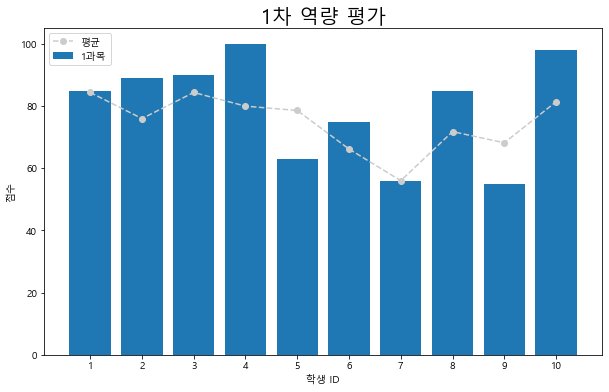

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# 그래프 내에 한글을 사용하기 위해 처리
mpl.rc('font', family='Malgun Gothic')


x_label = std_id.flatten().tolist() # x 축 눈금
score_sub1 = std_score[:, :1].flatten() # 과목1 점수

# plt.plot(x_label, score_sub1, linestyle='--', marker='o', label="sub1")
plt.figure(figsize=(10,6))
plt.bar(x_label, score_sub1, label="1과목")
plt.plot(x_label, tmp6, linestyle='--', marker='o', label="평균", color='#cccccc')
plt.legend()
plt.title('1차 역량 평가', fontsize=20)
plt.xticks(std_id)
plt.xlabel('학생 ID')
plt.ylabel('점수')
# plt.yticks(range(0,100,20))

plt.show()

# Broadcasting

- shape이 다른 NumPy 배열이 연산을 하려고 할 때 특정조건이 만족되면 자동으로 연산이 가능한 형태로 변환하는 것
- NumPy에서 vector나 matrix간에 사칙연산을 하면, 같은 위치의 원소끼리 계산이 이뤄지며 
- 이렇게 되려면 계산하려는 vector나 matrix가 형태가 같아야 하는데, 이때 shape이 맞춰지는 것을 broadcasting이라고 한다.


![title](http://www.astroml.org/_images/fig_broadcast_visual_1.png)


In [64]:
import numpy as np

# 산술연산
A = np.array([2,3,4,5])
B = np.arange(10, 30, 5)

A*2
[1,2,3]*2

# Broadcasting
C = np.arange(1, 10).reshape(3, 3)
print(C)
print(C+2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


# Filtering

In [74]:
import numpy as np

A = np.arange(1, 10)
print(A)
print(A % 3)
print(A[A % 3])
print(A[A > 4])
print(A[A % 3 == 0])

A % 3


[1 2 3 4 5 6 7 8 9]
[1 2 0 1 2 0 1 2 0]
[2 3 1 2 3 1 2 3 1]
[5 6 7 8 9]
[3 6 9]


array([1, 2, 0, 1, 2, 0, 1, 2, 0], dtype=int32)

In [72]:
B = np.array([1, 2, 3, 4, 5])
C = np.array([0, 1, 3, 0, 5])

B == C

B[B != C]

array([1, 2, 4])

In [87]:
D = np.array([2,1,0,3,4,5,6,7,8,9])
D % 3
print(D%3)
print(D[D%3])

[2 1 0 0 1 2 0 1 2 0]
[0 1 2 2 1 0 2 1 0 2]


# Random 
- random 모듈을 사용하여, 배열 생성

## normal() : 정규분포

In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
a = np.random.normal()
print(a)

b = np.random.normal(5)
print(b)

c = np.random.normal(size=(3,4))
print(c)

-1.0162151894413671
6.109609446147998
[[ 0.9301147   0.1398158  -0.9190598   0.38421116]
 [ 1.33323431  1.51283747 -0.55699903 -2.36691677]
 [-0.13525041 -1.25725682  0.31273621  0.06185589]]


### np.random.seed(seed=n)

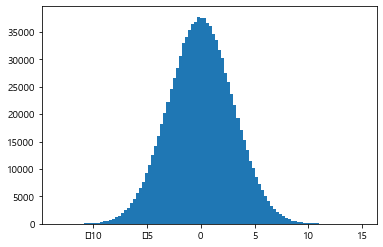

In [94]:
np.random.seed(seed = 5)

d = np.random.normal(loc=0, scale=3, size = 1000000)
plt.hist(d, bins=100)
plt.show()

In [96]:
e = np.random.randn(2,4)
e

array([[-0.27407666, -0.80252845, -1.06733079, -0.68395179],
       [-1.60278754, -0.40219312, -0.68322937, -0.88797981]])

## 균등 분포

### np.random.random

In [100]:
a = np.random.random((2,3))
a

array([[0.64713043, 0.34525781, 0.21408718],
       [0.78251465, 0.3883507 , 0.03547221]])

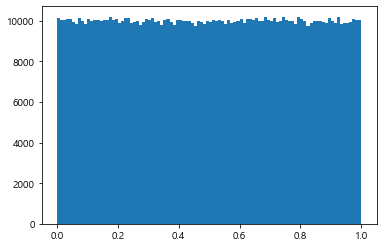

In [101]:
b = np.random.random(1000000)
plt.hist(b, bins = 100)
plt.show()

In [143]:
a = np.random.randint(3)
print(a)

b = np.random.randint(3, 10)
print(b)

c = np.random.randint(3, 10, 6)
print(c)

d = np.random.randint(0, 100, (5,5))
print(d)

2
8
[5 8 6 9 5 5]
[[72 36 15 11 79]
 [40  6 25 34 47]
 [80 10 44 27 98]
 [95 49 24 15  8]
 [45 90 81 12 96]]
